<a href="https://colab.research.google.com/github/Gnana212/Gnanalakshmi_212/blob/main/Assessment2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [ ]:
import pandas as pd

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [110]:
df = pd.concat(map(pd.read_csv, ['college_1.csv', 'college_2.csv']), ignore_index=True)
print(df)

              Name  python  mysql  Previous Geekions  CodeKata Score  \
0        A.Dharani    82.0   20.0              24500           24500   
1      V.JEEVITHA     82.0   20.0              21740           21740   
2      HEMAVATHI.R   100.0  100.0              19680           19680   
3      Mugunthan S   100.0   47.0              10610           10610   
4      Sathammai.S   100.0    8.0               8980            8980   
..             ...     ...    ...                ...             ...   
114  praveen raj j    24.0    0.0               2380            2380   
115     AMARNATH D    -1.0   12.0               1890            1890   
116           bala    32.0    0.0               1720            1720   
117           XY Z    -1.0   -1.0                  0               0   
118      Hariharan    -1.0   -1.0                  0               0   

                                    Department  Rising  python_en  \
0             Computer Science and Engineering       0        NaN 

###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [111]:
import pandas as pd 
 


df['bins'] = pd.cut(df['CodeKata Score'],bins=[0,7000,10000,15000,25000], labels=["0-7000","7000-10000","10000-15000","15000+"])
df = df.groupby(['CodeKata Score', 'bins']).size().unstack(fill_value=0)
print (df)


bins            0-7000  7000-10000  10000-15000  15000+
CodeKata Score                                         
0                    0           0            0       0
40                   3           0            0       0
60                   1           0            0       0
100                  2           0            0       0
120                  4           0            0       0
...                ...         ...          ...     ...
14490                0           0            1       0
19400                0           0            0       1
19680                0           0            0       1
21740                0           0            0       1
24500                0           0            0       1

[103 rows x 4 columns]


###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [10]:
#df = df['CodeKata Score'].to_frame()
df['Previous Geekions'] = df['CodeKata Score'].rolling(30).mean()
df.dropna(inplace=True)
df

,CodeKata Score,Previous Geekions
58,580,1439.666667
59,490,1375.666667
60,410,1310.666667
61,380,1248.000000
62,300,1183.333333
...,...,...
114,2380,7168.000000
115,1890,6748.000000
116,1720,6445.666667
117,0,6111.000000


###### No of students participated 

In [113]:
len(df)

103

###### #Average completion of python course or my_sql or python english or computational thinking

In [23]:
df1 = df[["python","mysql","python_en","computational_thinking"]].mean()
print(df1)


python                    54.352941
mysql                     23.500000
python_en                 29.657143
computational_thinking     2.200000
dtype: float64


###### rising star of the week (top 3 candidate who performed well in that particular week)

In [28]:
df.nlargest(3, 'Rising')['Name']


92              shifak N
86     Ganesh Ramkumar R
102       Narasimhan Y L
Name: Name, dtype: object

###### Shining stars of the week (top 3 candidates who has highest geekions)

In [29]:
df.nlargest(3, 'Previous Geekions')['Name']


0      A.Dharani
1    V.JEEVITHA 
2    HEMAVATHI.R
Name: Name, dtype: object

###### Department wise codekata performence (pie chart)

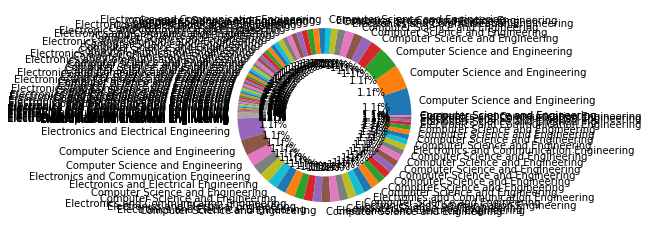

In [82]:
import numpy as np 
from matplotlib import pyplot as plt

codekata = df["CodeKata Score"]
Department = df["Department"]
plt.pie(codekata,labels = Department,autopct = "1.1f%%")
circle = plt.Circle((0,0),0.7,color='white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

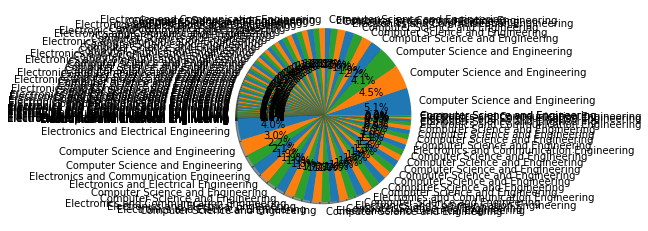

In [76]:
import numpy as np 
from matplotlib import pyplot as plt

codekata = df["CodeKata Score"]
Department = df["Department"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
#explode = (0, 0, 0)  
#fig = plt.figure(figsize =(30, 70))
plt.pie(codekata, labels=Department, colors=colors , autopct='%1.1f%%', shadow=True, startangle=0)


plt.show()

 

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

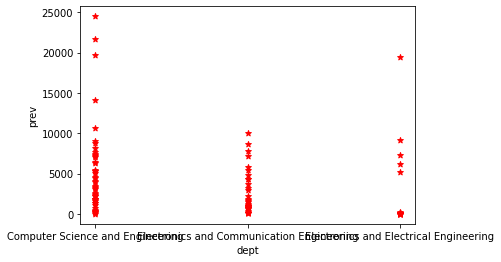

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
df = df.head(100)
x = df["Department"]
y = df["Previous Geekions"]
plt.scatter(x,y,marker="*",color="red")
plt.xlabel("dept")
plt.ylabel("prev")
plt.show()

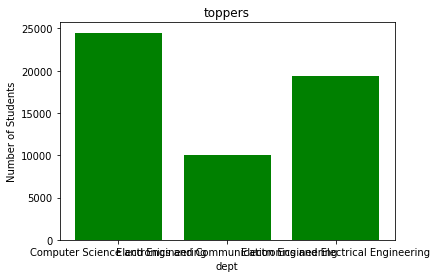

In [104]:
import matplotlib.pyplot as plt
import pandas as pd
  
X= df["Department"]
Y= df["Previous Geekions"]
plt.bar(X, Y, color='g')
plt.title("toppers")
plt.xlabel("dept")
plt.ylabel("Number of Students")
plt.show()

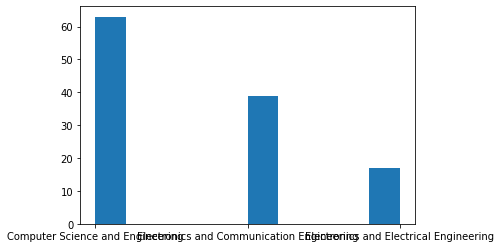

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
e = df['Department']
plt.hist(e)
plt.show()